In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data1.csv")
df

,ID,Failure_ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,ExpBreak (Target),Age2018
0,37260,73.0,2012,1996,2.0,574.17,16.0,14,1,22
1,13986,96.0,2012,1986,4.0,1123.21,26.0,4,1,32
2,13986,185.0,2012,1986,4.0,1123.21,26.0,4,1,32
3,4582,99.0,2012,1980,2.0,107.85,32.0,12,1,38
4,31809,98.0,2012,1980,2.0,132.37,32.0,12,1,38
...,...,...,...,...,...,...,...,...,...,...
42500,7461,NaN,NaN,1888,8.0,1.54,NaN,3,0,130
42501,43862,NaN,NaN,1888,2.5,2.64,NaN,3,0,130
42502,43863,NaN,NaN,1888,2.5,2.57,NaN,3,0,130
42503,33231,NaN,NaN,1888,6.0,0.67,NaN,3,0,130


In [3]:
df = df.drop("Failure_ID", axis=1)

In [4]:
df["HasBreakRecord"] = (~df["BreakYear"].isna()).astype(int)
df["BreakYear"] = df["BreakYear"].fillna(0)
df["BreakAge"]  = df["BreakAge"].fillna(0)




In [5]:
df.head()

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,ExpBreak (Target),Age2018,HasBreakRecord
0,37260,2012,1996,2.0,574.17,16.0,14,1,22,1
1,13986,2012,1986,4.0,1123.21,26.0,4,1,32,1
2,13986,2012,1986,4.0,1123.21,26.0,4,1,32,1
3,4582,2012,1980,2.0,107.85,32.0,12,1,38,1
4,31809,2012,1980,2.0,132.37,32.0,12,1,38,1


In [6]:
df.sample(20)

,ID,BreakYear,InstallYear,Diameter,Length,BreakAge,Material,ExpBreak (Target),Age2018,HasBreakRecord
37029,32368,0,1944,8.0,33.50,0.0,3,0,74,0
9159,8216,0,1967,6.0,15.41,0.0,3,0,51,0
37830,25176,0,1927,24.0,342.16,0.0,3,0,91,0
26580,38324,0,1992,12.0,550.60,0.0,12,0,26,0
20956,14319,0,2007,8.0,437.09,0.0,12,0,11,0
26770,11893,0,1991,8.0,202.58,0.0,12,0,27,0
28952,19578,0,1985,8.0,31.24,0.0,12,0,33,0
40087,26811,0,1923,8.0,149.68,0.0,3,0,95,0
26334,5372,0,1992,16.0,956.68,0.0,6,0,26,0
40039,26736,0,1923,6.0,322.27,0.0,3,0,95,0


In [7]:
df["HasBreakRecord"].value_counts()

HasBreakRecord
0    39491
1     3014
Name: count, dtype: int64


🔹 Missing Value Summary:
ID                   0
BreakYear            0
InstallYear          0
Diameter             0
Length               0
BreakAge             0
Material             0
ExpBreak (Target)    0
Age2018              0
HasBreakRecord       0
dtype: int64


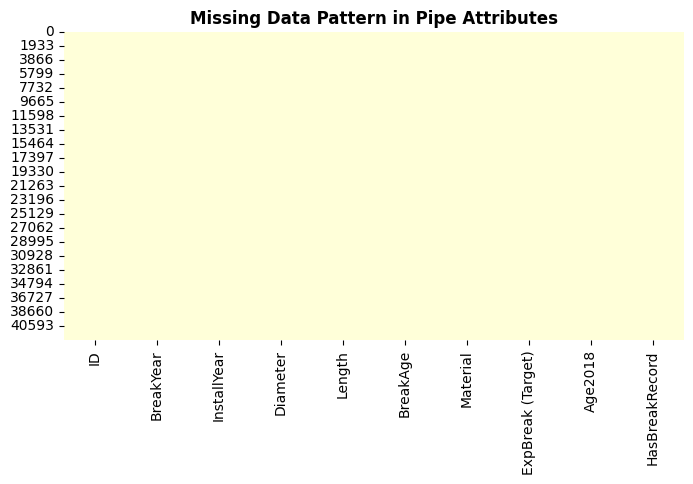

In [8]:
# Count missing values per column
print("\n🔹 Missing Value Summary:")
print(df.isnull().sum())

# Visualize missingness (optional, for journal figure)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Data Pattern in Pipe Attributes", fontsize=12, fontweight='bold')
plt.show()


In [9]:
print("\n📊 Descriptive Statistics:")
display(df.describe().T)



📊 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
ID,42505.0,23110.781814,12579.965986,1401.00,12409.00,22704.0,34246.00,46244.00
InstallYear,42505.0,1968.393507,31.968991,1888.00,1944.00,1967.0,1995.00,2018.00
Diameter,42505.0,7.564254,3.876221,0.00,6.00,6.0,8.00,48.00
Length,42505.0,140.171323,252.594346,0.06,14.33,18.6,192.14,4602.48
BreakAge,42505.0,3.263734,15.114904,0.00,0.00,0.0,0.00,104.00
Material,42505.0,6.400753,3.735602,0.00,3.00,6.0,12.00,14.00
ExpBreak (Target),42505.0,0.050912,0.219820,0.00,0.00,0.0,0.00,1.00
Age2018,42505.0,49.606493,31.968991,0.00,23.00,51.0,74.00,130.00
HasBreakRecord,42505.0,0.070909,0.256676,0.00,0.00,0.0,0.00,1.00


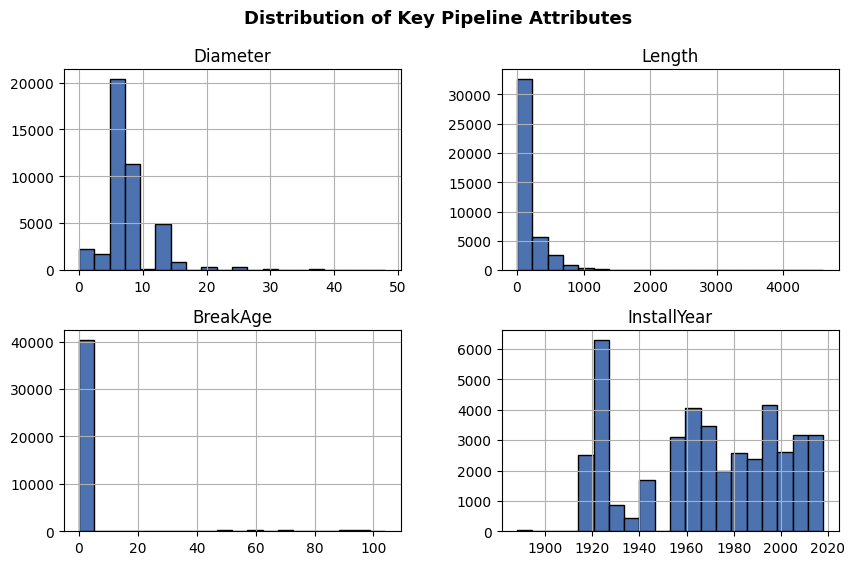

In [10]:
numeric_cols = ['Diameter', 'Length', 'BreakAge', 'InstallYear']
df[numeric_cols].hist(figsize=(10,6), bins=20, color='#4C72B0', edgecolor='black')
plt.suptitle("Distribution of Key Pipeline Attributes", fontsize=13, fontweight='bold')
plt.show()


C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\817696365.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


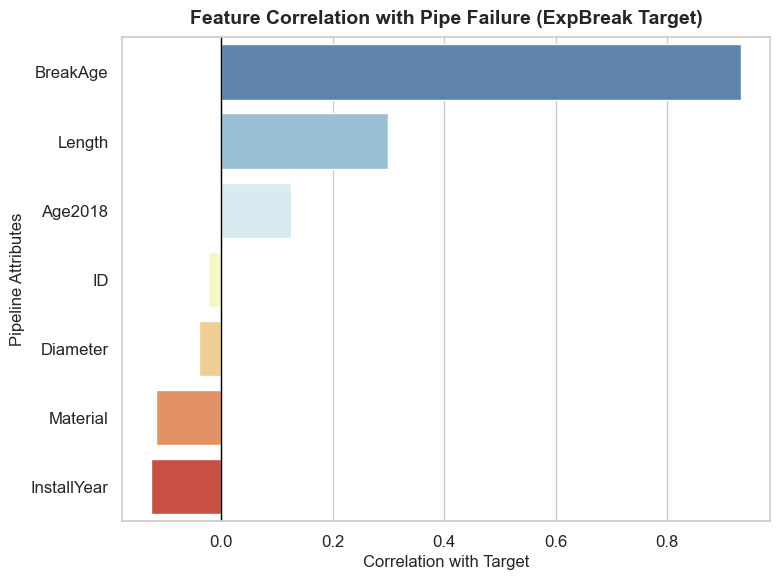

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

# 2️⃣ Compute correlation with the target variable
target_corr = numeric_df.corr()['ExpBreak (Target)'].sort_values(ascending=False)

# 3️⃣ Convert to DataFrame for easy plotting
corr_df = pd.DataFrame({'Feature': target_corr.index, 'Correlation': target_corr.values})
corr_df = corr_df[corr_df['Feature'] != 'ExpBreak (Target)']  # remove self-correlation

# 4️⃣ Plot correlation with target
plt.figure(figsize=(8,6))
sns.set(style="whitegrid", font_scale=1.1)

sns.barplot(
    data=corr_df,
    y='Feature',
    x='Correlation',
    palette='RdYlBu_r'
)

# 5️⃣ Styling
plt.title("Feature Correlation with Pipe Failure (ExpBreak Target)", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Correlation with Target", fontsize=12)
plt.ylabel("Pipeline Attributes", fontsize=12)
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


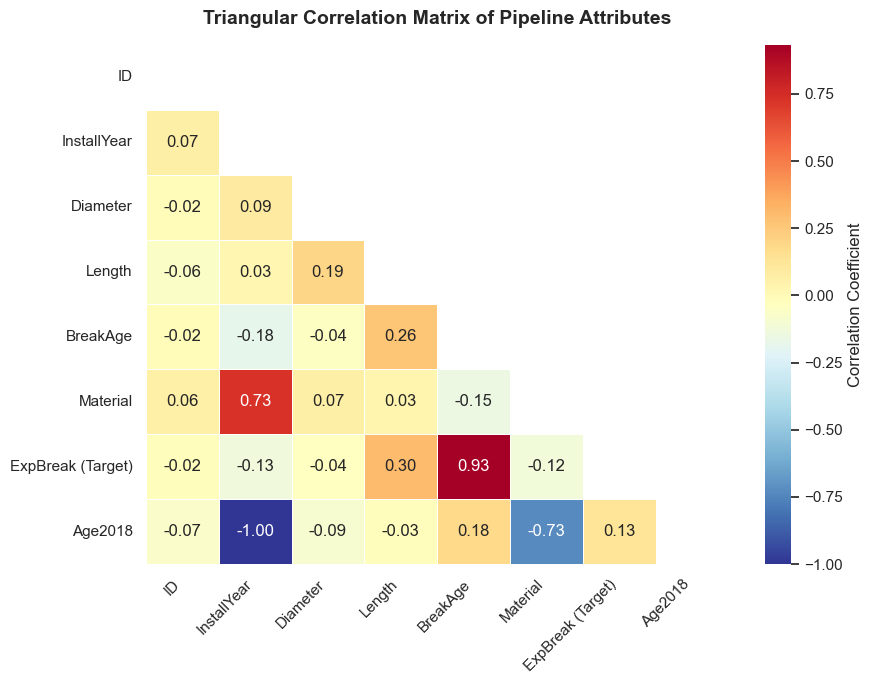

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️⃣ Select only numeric columns (avoid string conversion issues)
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

# 2️⃣ Compute correlation matrix
corr_matrix = numeric_df.corr()

# 3️⃣ Generate mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4️⃣ Set figure style
plt.figure(figsize=(9,7))
sns.set(style="white", font_scale=1.0)

# 5️⃣ Create triangular heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,                  # show only lower triangle
    annot=True,                 # show correlation values
    fmt=".2f",
    cmap="RdYlBu_r",            # reversed Red-Yellow-Blue for contrast
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

# 6️⃣ Titles and aesthetics
plt.title("Triangular Correlation Matrix of Pipeline Attributes", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\942923317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ExpBreak (Target)', data=df, palette=['#2E86AB', '#A23B72'])


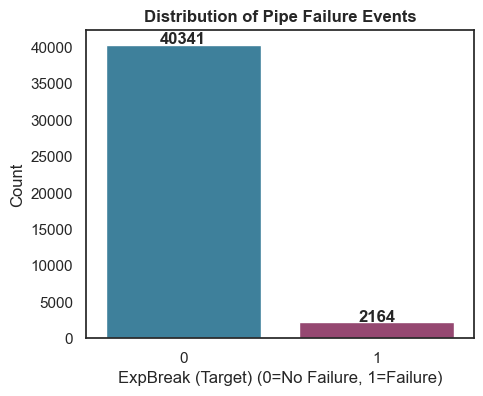

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='ExpBreak (Target)', data=df, palette=['#2E86AB', '#A23B72'])
plt.title("Distribution of Pipe Failure Events", fontsize=12, fontweight='bold')
plt.xlabel("ExpBreak (Target) (0=No Failure, 1=Failure)")
plt.ylabel("Count")

for i, v in enumerate(df['ExpBreak (Target)'].value_counts()):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')

plt.show()


C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\4237819858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ExpBreak (Target)', y='Diameter', data=df, ax=axs[0,0], palette="Set2")
C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\4237819858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ExpBreak (Target)', y='Length', data=df, ax=axs[0,1], palette="Set2")
C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\4237819858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ExpBreak (Target)', y='BreakAge', data=df, ax=axs[1,0], palette="S

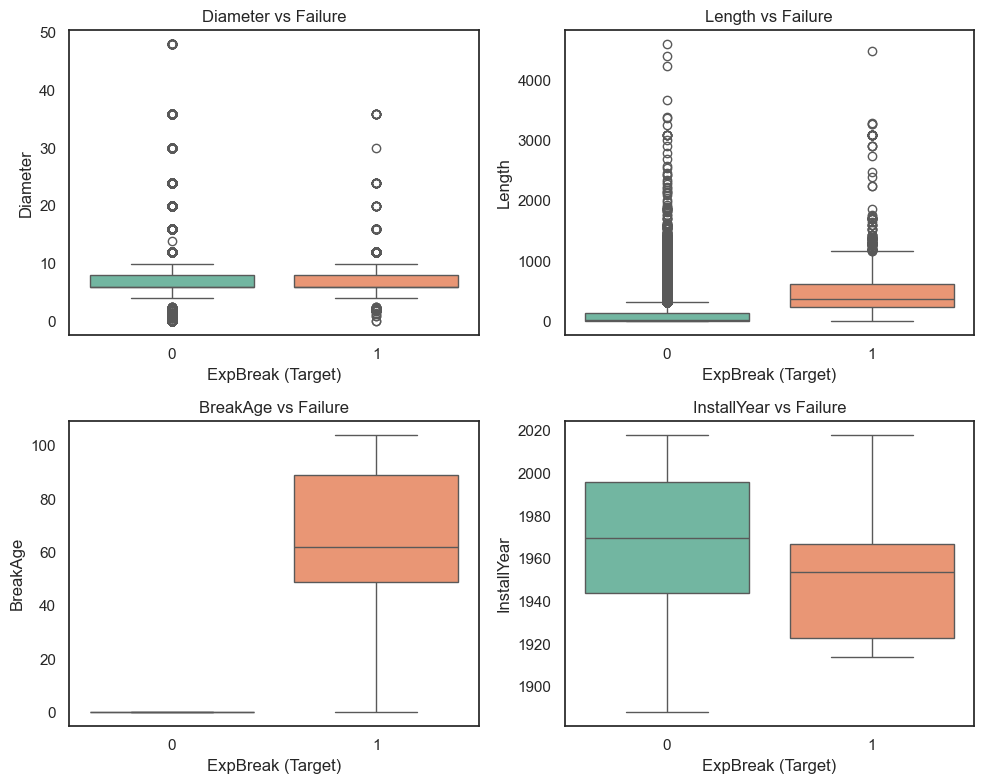

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))

sns.boxplot(x='ExpBreak (Target)', y='Diameter', data=df, ax=axs[0,0], palette="Set2")
sns.boxplot(x='ExpBreak (Target)', y='Length', data=df, ax=axs[0,1], palette="Set2")
sns.boxplot(x='ExpBreak (Target)', y='BreakAge', data=df, ax=axs[1,0], palette="Set2")
sns.boxplot(x='ExpBreak (Target)', y='InstallYear', data=df, ax=axs[1,1], palette="Set2")

axs[0,0].set_title("Diameter vs Failure")
axs[0,1].set_title("Length vs Failure")
axs[1,0].set_title("BreakAge vs Failure")
axs[1,1].set_title("InstallYear vs Failure")

plt.tight_layout()
plt.show()


C:\Users\Ad\AppData\Local\Temp\ipykernel_24384\2891942814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HasBreakRecord', data=df, palette=['#4C72B0', '#DD8452'])


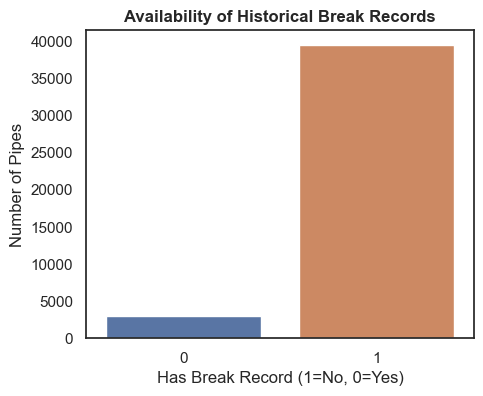

In [15]:
df["HasBreakRecord"] = (df["BreakYear"] == 0).astype(int)

plt.figure(figsize=(5,4))
sns.countplot(x='HasBreakRecord', data=df, palette=['#4C72B0', '#DD8452'])
plt.title("Availability of Historical Break Records", fontsize=12, fontweight='bold')
plt.xlabel("Has Break Record (1=No, 0=Yes)")
plt.ylabel("Number of Pipes")
plt.show()


In [16]:
target_corr = df.corr()['ExpBreak (Target)'].sort_values(ascending=False)
print("\n🔹 Feature Correlation with Target:")
print(target_corr)


ValueError: could not convert string to float: 'Null'

Temporal Analysis – Break Frequency Over Years

Goal: Understand how pipe failure frequency evolved over time.
You can identify peak years, aging effects, and infrastructure degradation patterns.

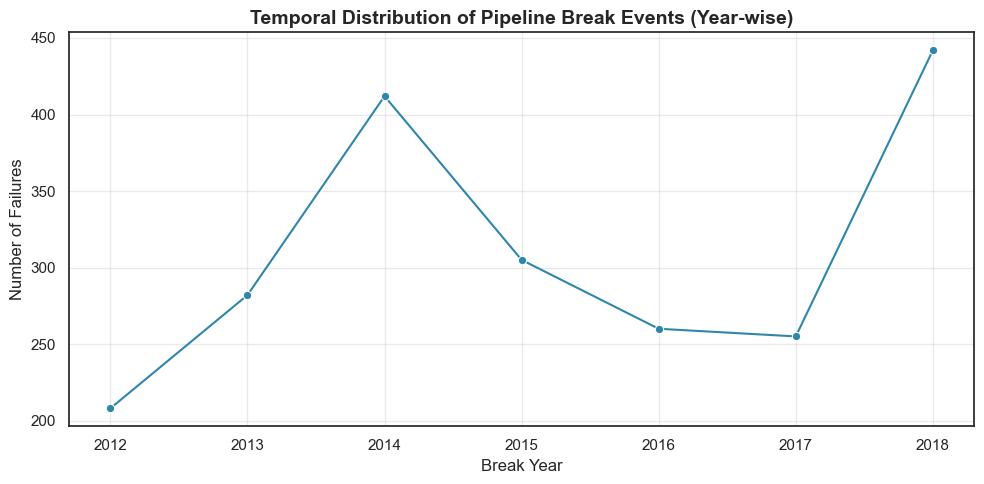

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert BreakYear to integer, handle missing
df['BreakYear'] = pd.to_numeric(df['BreakYear'], errors='coerce')

# Group by BreakYear and count number of failures
break_trend = df[df['BreakYear'] > 0].groupby('BreakYear').size().reset_index(name='FailureCount')

# Plot temporal trend
plt.figure(figsize=(10,5))
sns.lineplot(data=break_trend, x='BreakYear', y='FailureCount', marker='o', color='#2E86AB')
plt.title("Temporal Distribution of Pipeline Break Events (Year-wise)", fontsize=14, fontweight='bold')
plt.xlabel("Break Year")
plt.ylabel("Number of Failures")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


2️⃣ Failure Rate by Installation Period

Pipes installed in older decades often experience higher break probability.
Let’s aggregate by InstallYear and see how failure rate changes.

C:\Users\Ad\AppData\Local\Temp\ipykernel_7228\1746443039.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=install_trend, x='InstallDecade', y='FailureRate', palette='coolwarm')


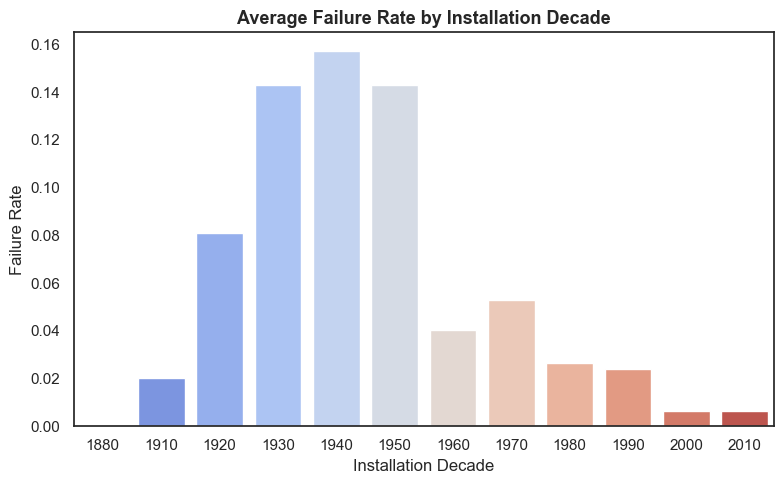

In [23]:
# Group by installation decade
df['InstallDecade'] = (df['InstallYear'] // 10) * 10

install_trend = (
    df.groupby('InstallDecade')['ExpBreak (Target)']
      .mean()
      .reset_index()
      .rename(columns={'ExpBreak (Target)': 'FailureRate'})
)

plt.figure(figsize=(8,5))
sns.barplot(data=install_trend, x='InstallDecade', y='FailureRate', palette='coolwarm')
plt.title("Average Failure Rate by Installation Decade", fontsize=13, fontweight='bold')
plt.xlabel("Installation Decade")
plt.ylabel("Failure Rate")
plt.tight_layout()
plt.show()


3️⃣ Temporal-Age Interaction: Break Frequency vs Pipe Age

This identifies the critical age window where most breaks occur.

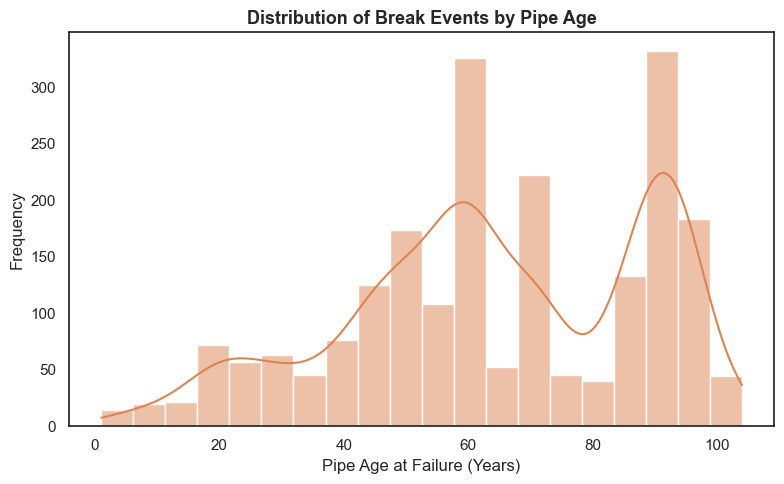

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['BreakAge'] > 0]['BreakAge'], bins=20, kde=True, color='#DD8452')
plt.title("Distribution of Break Events by Pipe Age", fontsize=13, fontweight='bold')
plt.xlabel("Pipe Age at Failure (Years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Failure Count by Material and Time

Helps to identify which materials degrade fastest over time.

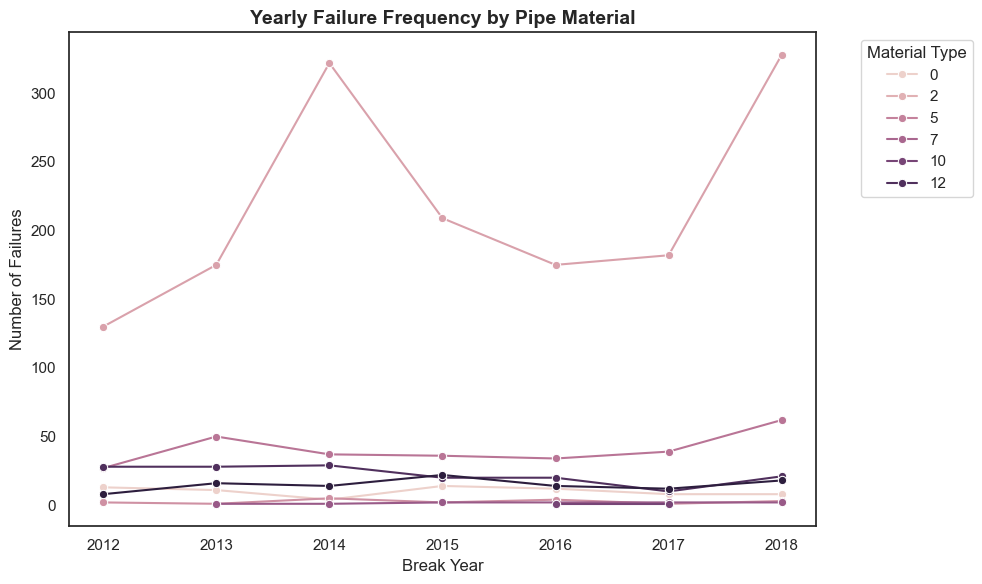

In [25]:
# Compute yearly failures by material
material_trend = (
    df[df['BreakYear'] > 0]
    .groupby(['BreakYear', 'Material'])
    .size()
    .reset_index(name='Failures')
)

plt.figure(figsize=(10,6))
sns.lineplot(data=material_trend, x='BreakYear', y='Failures', hue='Material', marker='o')
plt.title("Yearly Failure Frequency by Pipe Material", fontsize=14, fontweight='bold')
plt.xlabel("Break Year")
plt.ylabel("Number of Failures")
plt.legend(title="Material Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


dvanced Failure Pattern Studies (for Paper)

Once EDA is complete, you can transition into advanced pattern recognition and failure behavior modeling.

Below are techniques commonly accepted in research on pipeline risk prediction:

a) Survival Analysis (Time-to-Failure Modeling)

Models the probability of pipe survival beyond a given time.

Ideal for censored data (pipes that haven’t failed yet).

Common model: Cox Proportional Hazards Model

In [28]:
# !pip install lifelines

In [18]:
from lifelines import CoxPHFitter

cox_df = df[['BreakAge', 'Age2018', 'Diameter', 'Length', 'Material', 'ExpBreak (Target)']].copy()
cox_df = cox_df.dropna()

cph = CoxPHFitter()
cph.fit(cox_df, duration_col='BreakAge', event_col='ExpBreak (Target)')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 42505 total observations, 40341 right-censored observations>
             duration col = 'BreakAge'
                event col = 'ExpBreak (Target)'
      baseline estimation = breslow
   number of observations = 42505
number of events observed = 2164
   partial log-likelihood = -9999.65
         time fit was run = 2025-10-07 17:13:32 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
Age2018   -0.59      0.56      0.01           -0.61           -0.56                0.54                0.57
Diameter   0.00      1.00      0.01           -0.01            0.01                0.99                1.01
Length     0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Material   0.01      1.01      0.01           -0.01            0.02                0.99                1.02

           cmp to      z      p  -log2(p)
covariate                                
Age2018      0.00 -45.76 <0.005       inf
Diameter     0.00   0.38   0.71      0.50
Length       0.00   1.70   0.09      3.48
Material     0.00   0.71   0.48      1.07
---
Concordance = 0.95
Partial AIC = 20007.30
log-likelihood ratio test = 8991.54 on 4 df
-log2(p) of ll-ratio test = inf

🧠 Interpretation:
Hazard ratios > 1 indicate features that increase failure risk (e.g., longer or older pipes).

(b) Kaplan–Meier Survival Curves (Non-parametric)

Visualize survival probability over time.

Stratify by material type or diameter.

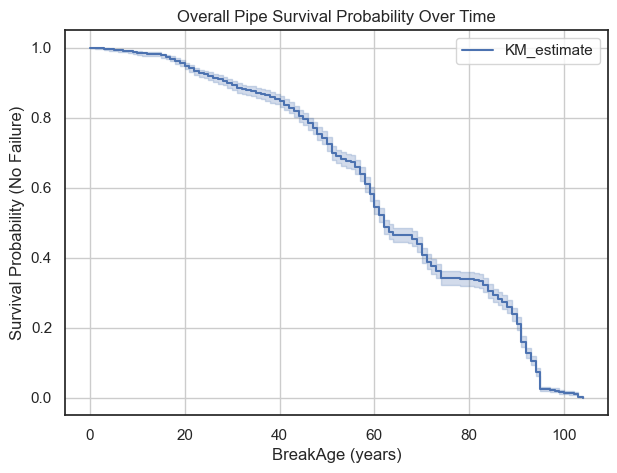

In [19]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

# Fit the KM curve using BreakAge and event flag
kmf.fit(durations=cox_df['BreakAge'], event_observed=cox_df['ExpBreak (Target)'])

plt.figure(figsize=(7,5))
kmf.plot(ci_show=True)
plt.title("Overall Pipe Survival Probability Over Time")
plt.xlabel("BreakAge (years)")
plt.ylabel("Survival Probability (No Failure)")
plt.grid(True)
plt.show()


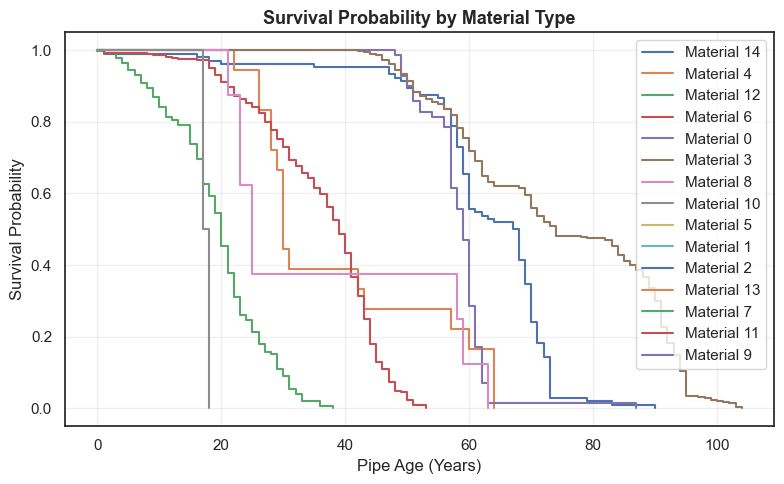

In [30]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
plt.figure(figsize=(8,5))

for m in df['Material'].unique():
    subset = df[df['Material'] == m]
    kmf.fit(subset['BreakAge'], event_observed=subset['ExpBreak (Target)'], label=f"Material {m}")
    kmf.plot(ci_show=False)

plt.title("Survival Probability by Material Type", fontsize=13, fontweight='bold')
plt.xlabel("Pipe Age (Years)")
plt.ylabel("Survival Probability")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


| Encoded Value | Original Material Type                      |
| ------------: | ------------------------------------------- |
|             0 | AC                                          |
|             1 | BRASS                                       |
|             2 | CERTALOCK                                   |
|             3 | CI (Cast Iron)                              |
|             4 | CON (Concrete)                              |
|             5 | CU (Copper)                                 |
|             6 | DI (Ductile Iron)                           |
|             7 | FUSPVC                                      |
|             8 | GAL (Galvanized Iron)                       |
|             9 | PCCP (Prestressed Concrete Cylinder Pipe)   |
|            10 | PE (Polyethylene)                           |
|            11 | PE/DI (Composite Polyethylene/Ductile Iron) |
|            12 | PVC                                         |
|            13 | PVC-C905                                    |
|            14 | ST (Steel)                                  |


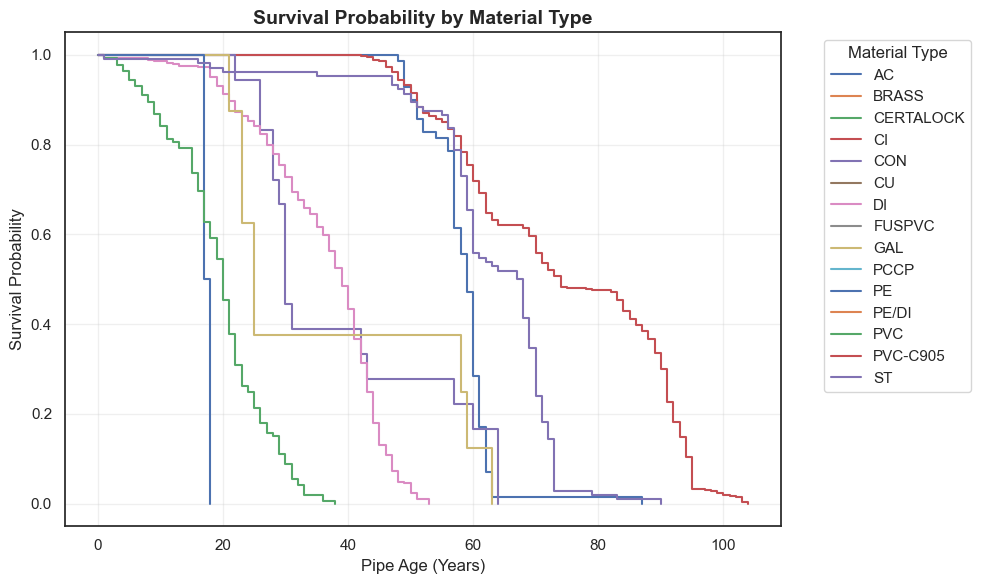

In [32]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 🔹 Material encoding mapping (from your earlier result)
material_mapping = {
    0: "AC",
    1: "BRASS",
    2: "CERTALOCK",
    3: "CI",
    4: "CON",
    5: "CU",
    6: "DI",
    7: "FUSPVC",
    8: "GAL",
    9: "PCCP",
    10: "PE",
    11: "PE/DI",
    12: "PVC",
    13: "PVC-C905",
    14: "ST"
}

# 🔹 Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(10,6))

# 🔹 Plot survival curves for each material type
for m in sorted(df['Material'].unique()):
    subset = df[df['Material'] == m]
    material_name = material_mapping.get(m, f"Material {m}")
    kmf.fit(subset['BreakAge'], event_observed=subset['ExpBreak (Target)'], label=material_name)
    kmf.plot(ci_show=False)

# 🔹 Formatting and labels
plt.title("Survival Probability by Material Type", fontsize=14, fontweight='bold')
plt.xlabel("Pipe Age (Years)", fontsize=12)
plt.ylabel("Survival Probability", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Material Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Figure X illustrates the Kaplan–Meier survival probability curves for different pipe materials, representing the likelihood that a pipe remains functional (without failure) as its operational age increases. The x-axis denotes pipe age in years, while the y-axis represents the probability of survival.

A clear distinction is observed among materials in terms of deterioration rates. PVC-C905 and Steel (ST) pipes demonstrate the highest survival probabilities across all age groups, maintaining above 60% survival even beyond 80 years of service life. These materials exhibit relatively slow degradation, likely due to their superior mechanical and corrosion-resistant properties.

In contrast, Cast Iron (CI) and Ductile Iron (DI) pipes display substantially steeper declines in survival probability, with failure likelihoods increasing sharply after approximately 40–50 years. The early drop in their survival curves indicates aging vulnerability, consistent with corrosion-induced and fatigue-related breakage documented in prior studies. Asbestos Cement (AC) and Galvanized Iron (GAL) pipes also show moderate longevity but decline steadily after midlife (~50 years), suggesting susceptibility to structural brittleness and environmental wear.

Synthetic materials such as Polyethylene (PE) and PVC exhibit intermediate survival performance, maintaining operational stability up to around 60 years, after which a gradual decay in survival probability is noted. This aligns with the expected long-term material softening and chemical degradation behaviors.

Overall, the survival analysis reveals a hierarchical durability pattern:
PVC-C905 > ST > PE ≈ PVC > DI > CI,
highlighting that polymer-based and steel pipes outperform traditional iron-based materials in long-term reliability.

This empirical evidence supports the transition toward polymeric and composite materials for sustainable pipeline infrastructure, particularly in networks subjected to aging and environmental stressors.